In [3]:
#NLTK text processing libraries for tasks like tokenization, stemming, tagging, parsing, and more.
!pip install nltk
# TextBlob library in Python. TextBlob is a simple and easy-to-use library built on top of NLTK
#TextBlob can be used for sentiment analysis, part-of-speech tagging, noun phrase extraction, translation, and more.
!pip install textblob



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#WordCloud is a popular library for creating visually appealing word clouds from text data
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# WordNet provides information on word meanings, synonyms, hypernyms, hyponyms, and more. 
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
#it is a data package within NLTK that provides pre-trained models for tokenization.
#punkt module is employed to leverage its pre-trained model for recognizing sentence boundaries in a given text.
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [8]:
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
vaci_data=pd.read_csv('./DATA/vaccination_tweets.csv')

In [13]:
vaci_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [14]:
vaci_data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [15]:
#Checking the null values in data set
vaci_data.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [16]:
#Here we don't have any target column for sentiment is not provided in the data set 
# we have to create one target column 

vaci_data.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [17]:
# We don't want all these columns in the data set 
# So the required dataset is now created

vaci_text=vaci_data.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1)

In [18]:
vaci_text

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...
...,...
11015,"The number of Covid-19 cases today, 17 Novembe..."
11016,First dose ✅\n#PfizerBioNTech
11017,"The number of Covid-19 cases today, 16 Novembe..."
11018,#PfizerBioNTech has developed new pill #Paxlov...


In [19]:
print(vaci_text['text'].iloc[0],"\n")
print(vaci_text['text'].iloc[1],'\n')
print(vaci_text['text'].iloc[2],'\n')

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 



In [20]:
vaci_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [21]:
# checking null values in data set
vaci_text.isnull().sum()

text    0
dtype: int64

In [22]:
#text preprocessing function
def data_processing(text):
    #text lowering 
    text = text.lower()
    #removing URL's using regex function
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    # removing hashtags and puncuations using regex function
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    #  Word Tokenization
    text_tokens = word_tokenize(text)
    # Removing stopwors from the text
    filtered_text = [w for w in text_tokens if w not in stop_words]
    # returning the joined text 
    return " ".join(filtered_text)

In [23]:
# Text preprocessing
vaci_text['text'] = vaci_text['text'].apply(data_processing)

In [24]:
print(vaci_text['text'].iloc[0],"\n")
print(vaci_text['text'].iloc[1],'\n')
print(vaci_text['text'].iloc[2],'\n')

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 



In [25]:
#dropping duplicates in the text
vaci_text = vaci_text.drop_duplicates('text')

In [26]:
# Text Lemmatization Function
def Lemmatization(data):
    text = [lemmatizer.lemmatize(word) for word in data]
    return data

In [27]:
vaci_text['text']=vaci_text['text'].apply(lambda x: Lemmatization(x))

C:\Users\HP\AppData\Local\Temp\ipykernel_22064\793984998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaci_text['text']=vaci_text['text'].apply(lambda x: Lemmatization(x))


In [28]:
#printing the preprocessed text 
c=0
for i in vaci_text['text']:
    if c>5:
        break
    print(i)
    c+=1

folks said daikon paste could treat cytokine storm pfizerbiontech
world wrong side history year hopefully biggest vaccination effort weve ev
coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years
facts immutable senator even youre ethically sturdy enough acknowledge 1 born
explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech
anyone useful adviceguidance whether covid vaccine safe whilst breastfeeding


In [29]:
# information of the resultant text
vaci_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10543 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10543 non-null  object
dtypes: object(1)
memory usage: 164.7+ KB


In [30]:
# Adding polarity to the data set 
def polarity(text):
    return TextBlob(text).sentiment.polarity


In [31]:
# Adding polarity  column to the data set
vaci_text['polarity']=vaci_text['text'].apply(polarity)

C:\Users\HP\AppData\Local\Temp\ipykernel_22064\439925700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaci_text['polarity']=vaci_text['text'].apply(polarity)


In [32]:
# Printing the data set
vaci_text.head()

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.0
1,world wrong side history year hopefully bigges...,-0.5
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0
3,facts immutable senator even youre ethically s...,0.1
4,explain need vaccine borisjohnson matthancock ...,0.0


In [33]:
# Sentiment Labelling to the data set using polarity
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [34]:
# Adding new polarity column to the dataset
vaci_text['sentiment'] = vaci_text['polarity'].apply(sentiment)

C:\Users\HP\AppData\Local\Temp\ipykernel_22064\4275644615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaci_text['sentiment'] = vaci_text['polarity'].apply(sentiment)


In [35]:
vaci_text.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

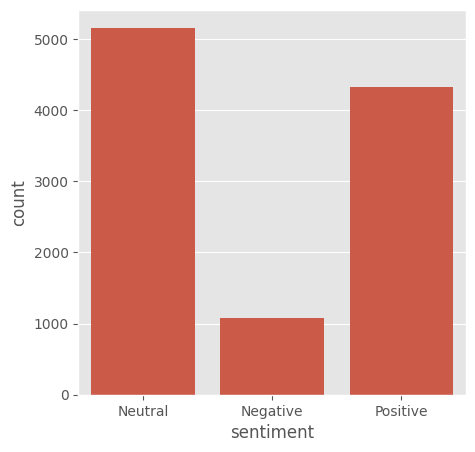

In [36]:
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = vaci_text)

Text(0.5, 1.0, 'Distribution of sentiments')

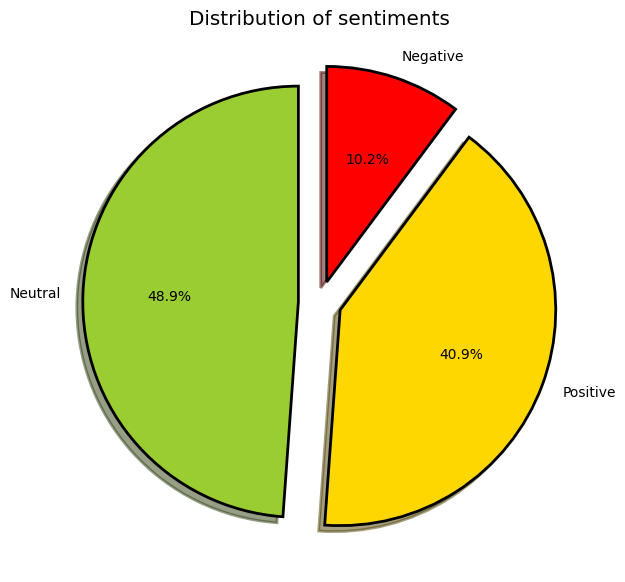

In [37]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = vaci_text['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [38]:
# printing the number of the tweets 
print("Total number of tweets is {}\n".format(vaci_text['text'].count()))
p=n=k=0
for i in vaci_text['sentiment']:
    if i=='Positive':
        p+=1
    if i=='Negative':
        n+=1
    if i=='Neutral':
        k+=1
print("Total Number of Positive tweets is {}\n" .format(p))
print("Total Number of Negative tweets is {}\n" .format(n))
print("Total Number of Neutral tweets is {}\n" .format(k))

Total number of tweets is 10543

Total Number of Positive tweets is 4317

Total Number of Negative tweets is 1075

Total Number of Neutral tweets is 5151



In [39]:
# Positive word cloud representation
pos_tweets = vaci_text[vaci_text.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
9317,best way get merrygoround pfizer pfizerbiontec...,1.0,Positive
2340,applying emotion pfizerbiontech based best evi...,1.0,Positive
6295,pfizer jab morning efficient wellorganised tha...,1.0,Positive
5041,get art printed awesome products support redbu...,1.0,Positive
1055,already vaccinated getting vaccine soon plan t...,1.0,Positive


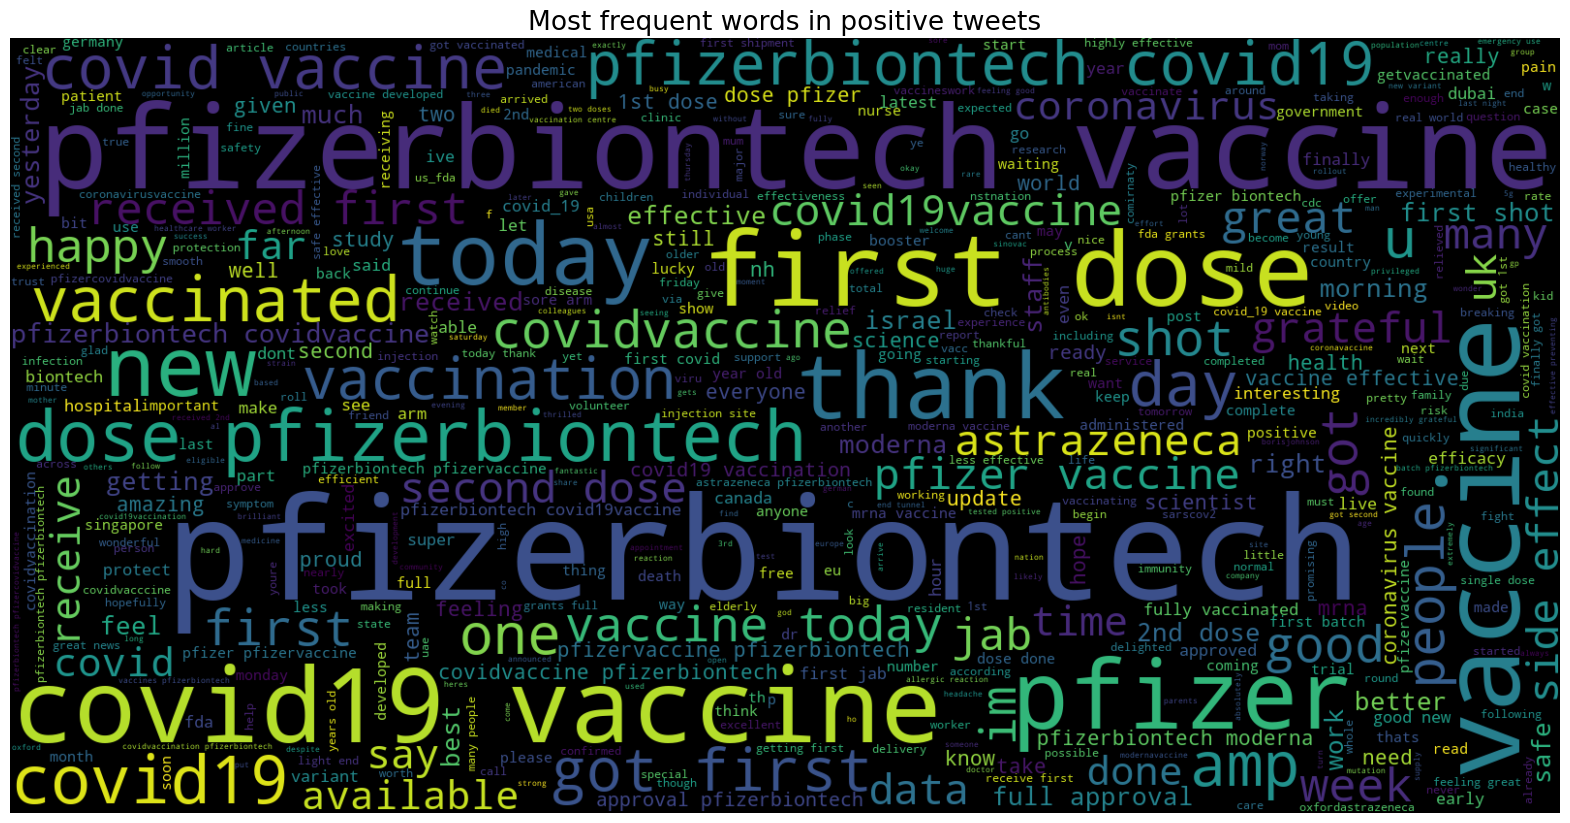

In [40]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()


In [41]:
#Negative Word cloud representation
neg_tweets = vaci_text[vaci_text.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


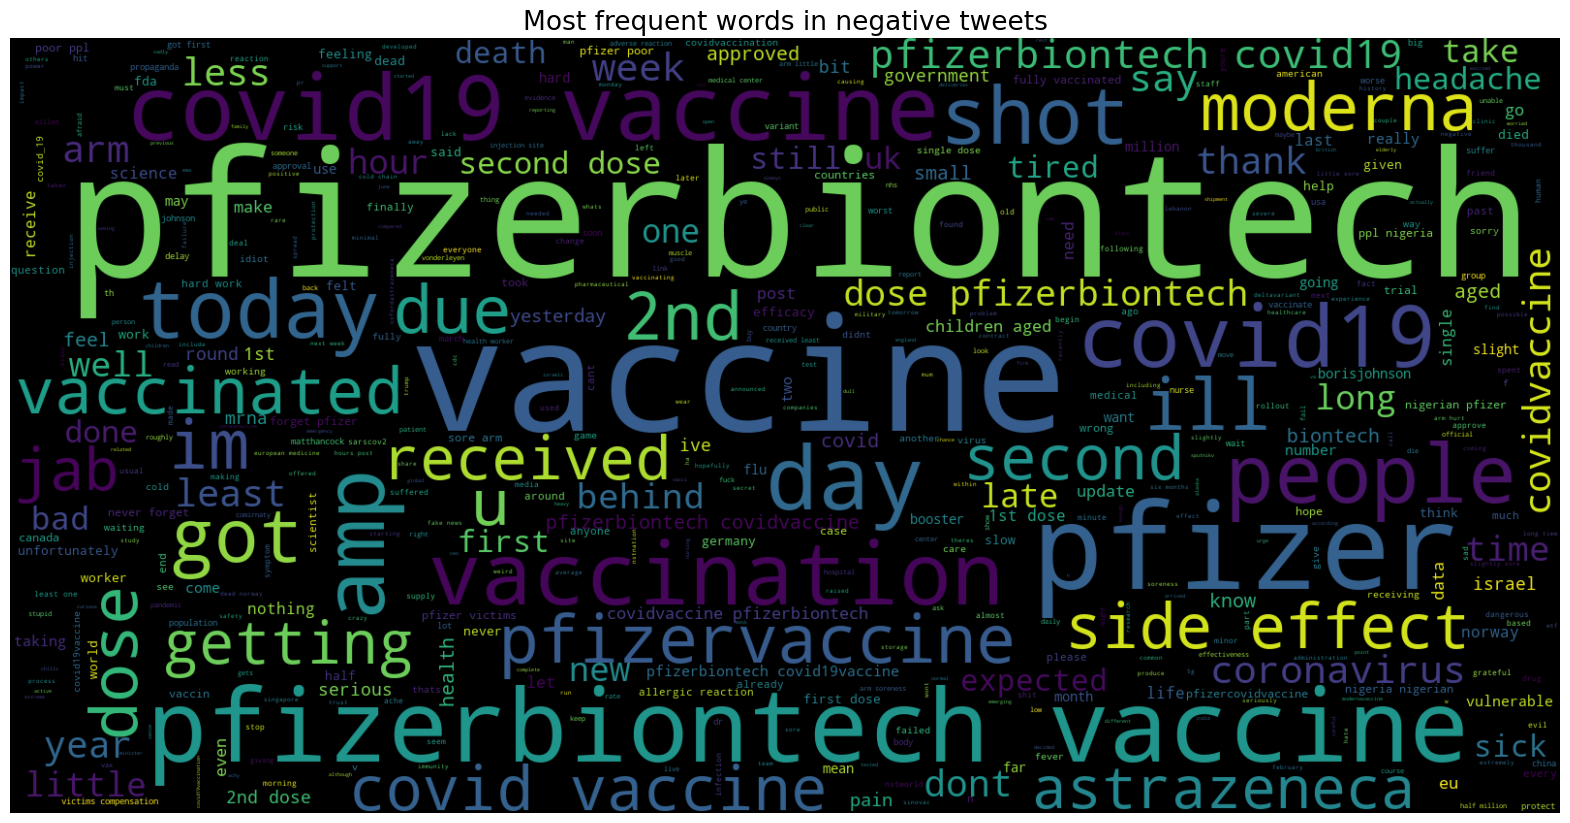

In [42]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [43]:
# Negative Word cloud formation
neutral_tweets = vaci_text[vaci_text.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7347,anyone else feel like framing vaccine card pfi...,0.0,Neutral
7458,looking forward getting second pfizer shot any...,0.0,Neutral
7454,never thought id running diff vaccine modernav...,0.0,Neutral
7453,john___m dont get choose one person know asked...,0.0,Neutral


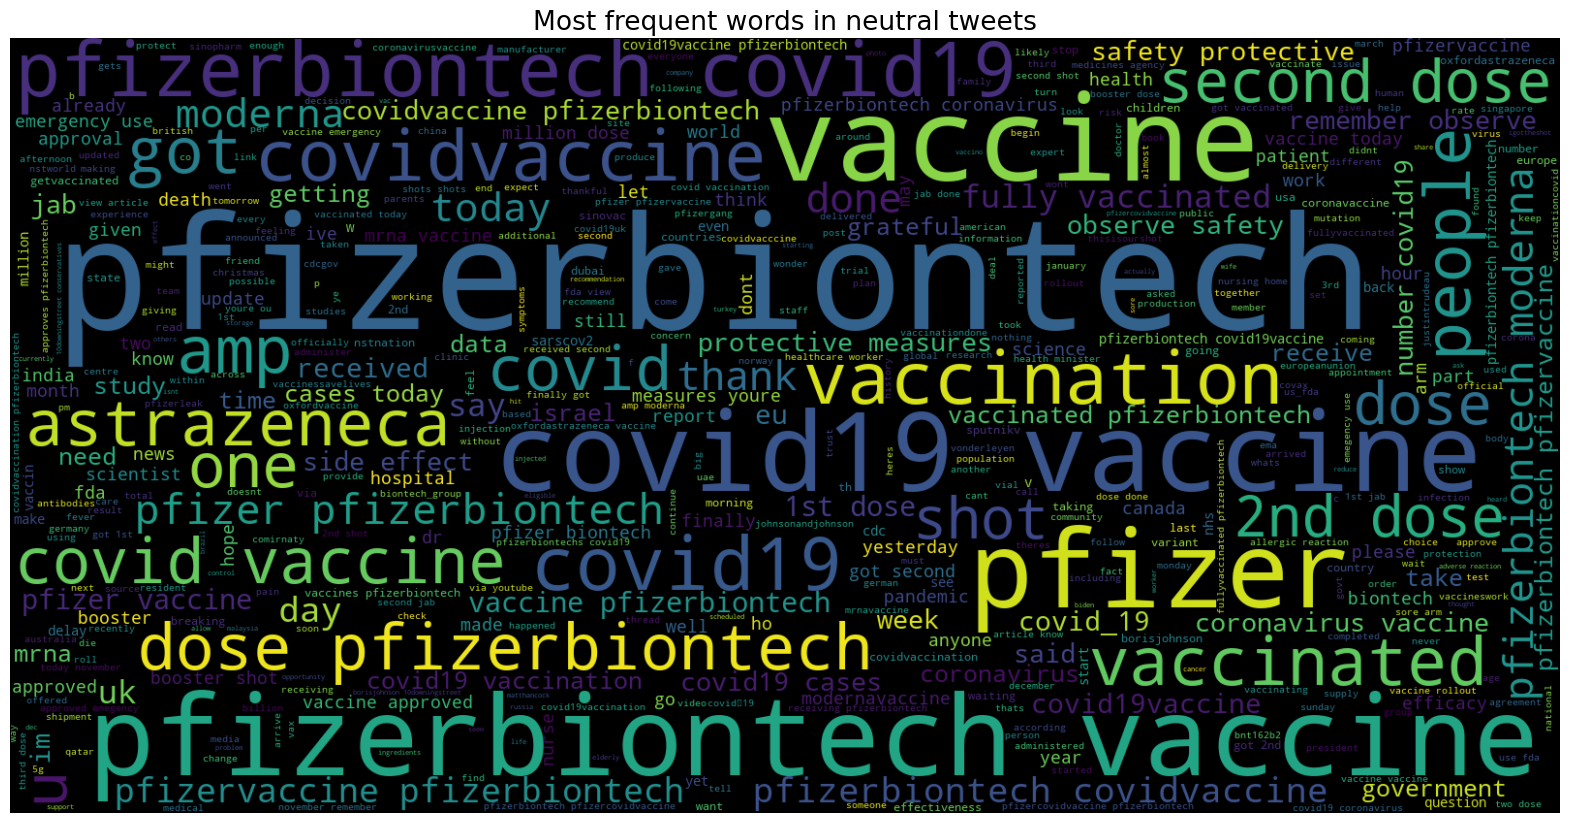

In [44]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [45]:
vaci_text.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


In [46]:
# Assuming your sentiment labels are in the 'label' column and range between 0 and 1
vaci_text['label'] = vaci_text['polarity'].apply(lambda x: 1 if x >= 0.5 else 0)


C:\Users\HP\AppData\Local\Temp\ipykernel_22064\991307868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaci_text['label'] = vaci_text['polarity'].apply(lambda x: 1 if x >= 0.5 else 0)


In [47]:
vaci_text.head()

,text,polarity,sentiment,label
0,folks said daikon paste could treat cytokine s...,0.0,Neutral,0
1,world wrong side history year hopefully bigges...,-0.5,Negative,0
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral,0
3,facts immutable senator even youre ethically s...,0.1,Positive,0
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral,0


In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vaci_text['text'], vaci_text['sentiment'], test_size=0.2, random_state=0)


In [49]:
X_train.count()

8434

In [50]:
X_test.count()

2109

In [51]:
# Convert text data to feature vectors using CountVectorizer
stop_words = list(stopwords.words('english'))
clf=Pipeline([('tfid',TfidfVectorizer(stop_words=stop_words)),('rfc',RandomForestClassifier(n_jobs=-1))])
clf.fit(X_train,y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [52]:
# Make predictions on the test set
predictions = clf.predict(X_test)

In [53]:
print(predictions)

['Neutral' 'Positive' 'Neutral' ... 'Neutral' 'Neutral' 'Neutral']


In [54]:
# Evaluate the performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)


In [55]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy: 0.87
Confusion Matrix:
 [[ 82  89  43]
 [  1 994  11]
 [  7 126 756]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.38      0.54       214
     Neutral       0.82      0.99      0.90      1006
    Positive       0.93      0.85      0.89       889

    accuracy                           0.87      2109
   macro avg       0.89      0.74      0.78      2109
weighted avg       0.88      0.87      0.86      2109



In [56]:
from sklearn.metrics import confusion_matrix

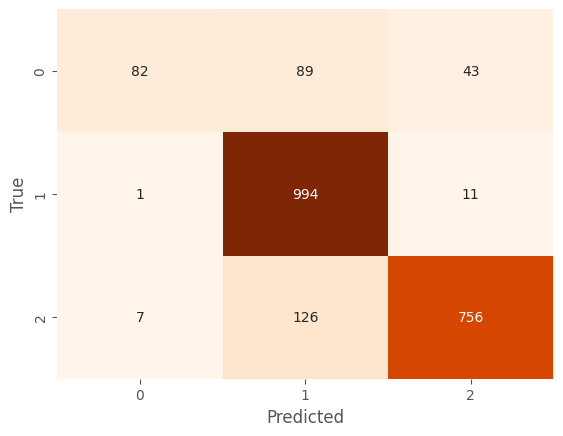

In [57]:
cm=confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [58]:
import pickle
pickle.dump(clf,open('twitter_sentiment.pkl','wb'))


In [59]:
clf.predict([' vaccine is Good'])

array(['Positive'], dtype=object)

In [60]:
clf.predict(['vaccine is bad'])

array(['Negative'], dtype=object)

In [61]:
clf.predict(['vaccine is nice'])

array(['Neutral'], dtype=object)